<a href="https://colab.research.google.com/github/17251A0404/Abhigna_INFO5731_Spring2024/blob/main/INFO5731_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
# Write your code here
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import re
import numpy as np

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Sample data (replace this with your own data)
documents = [
    "Machine learning is great for solving complex problems",
    "Natural language processing helps computers understand human language",
    "Artificial intelligence is the future of technology",
    "Data science involves analyzing large datasets to extract insights",
    "Deep learning is a subset of machine learning that uses neural networks"
]

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

processed_docs = [preprocess(doc) for doc in documents]

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_docs)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Function to compute coherence score for a given number of topics
def compute_coherence_score(corpus, dictionary, k, texts):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Find the optimal number of topics
min_topics = 2
max_topics = 10
topics_range = range(min_topics, max_topics + 1)
coherence_scores = []

for k in topics_range:
    score = compute_coherence_score(corpus=doc_term_matrix, dictionary=dictionary, k=k, texts=processed_docs)
    coherence_scores.append(score)

best_k = topics_range[np.argmax(coherence_scores)]
print("Optimal number of topics:", best_k)

# Train the LDA model with optimal number of topics
lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=best_k)

# Print the topics
print("Topics:")
for idx, topic in lda_model.print_topics(-1):
    print("Topic {}: {}".format(idx + 1, topic))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Optimal number of topics: 7
Topics:
Topic 1: 0.111*"learning" + 0.111*"machine" + 0.111*"great" + 0.111*"complex" + 0.111*"solving" + 0.111*"problem" + 0.014*"intelligence" + 0.014*"technology" + 0.014*"language" + 0.014*"future"
Topic 2: 0.033*"learning" + 0.033*"machine" + 0.033*"intelligence" + 0.033*"artificial" + 0.033*"technology" + 0.033*"future" + 0.033*"language" + 0.033*"science" + 0.033*"subset" + 0.033*"solving"
Topic 3: 0.174*"learning" + 0.093*"machine" + 0.093*"neural" + 0.093*"deep" + 0.093*"us" + 0.093*"network" + 0.093*"subset" + 0.012*"technology" + 0.012*"language" + 0.012*"artificial"
Topic 4: 0.033*"learning" + 0.033*"language" + 0.033*"machine" + 0.033*"intelligence" + 0.033*"future" + 0.033*"technology" + 0.033*"artificial" + 0.033*"science" + 0.033*"problem" + 0.033*"network"
Topic 5: 0.033*"intelligence" + 0.033*"machine" + 0.033*"technology" + 0.033*"learning" + 0.033*"future" + 0.033*"language" + 0.033*"problem" + 0.033*"artificial" + 0.033*"solving" + 0.033

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [26]:
# Write your code here
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [27]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


In [28]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [29]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [30]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [31]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [32]:
doc_set=[
    "Breaking: Alien Invasion Imminent, Government Warns",
    "Study Finds Vaccines Effective in Preventing Disease",
    "Billionaire Elon Musk to Fund Mission to Mars",
    "Exclusive: Top-Secret Government Files Leaked",
]

In [33]:
doc_clean=preprocess_data(doc_set)

In [34]:
doc_clean

[['break', 'alien', 'invas', 'immin', 'govern', 'warn'],
 ['studi', 'find', 'vaccin', 'effect', 'prevent', 'diseas'],
 ['billionair', 'elon', 'musk', 'fund', 'mission', 'mar'],
 ['exclus', 'top', 'secret', 'govern', 'file', 'leak']]

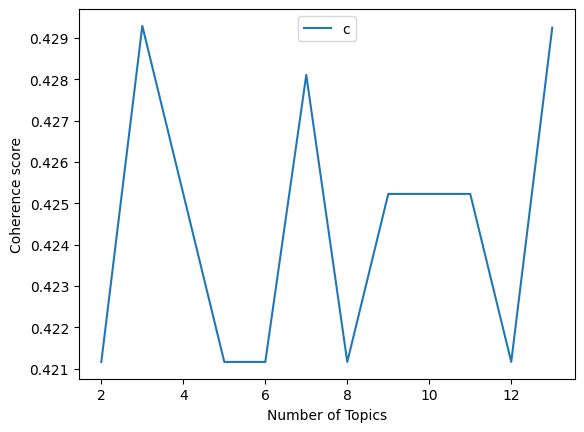

In [35]:
start,stop,step=2,14,1
plot_graph(doc_clean,start,stop,step)

In [36]:
dictionary,doc_term_matrix=prepare_corpus(doc_clean)
model = LsiModel(doc_term_matrix, num_topics=2, id2word = dictionary)
model.print_topics()

[(0,
  '0.535*"govern" + 0.267*"exclus" + 0.267*"top" + 0.267*"secret" + 0.267*"leak" + 0.267*"file" + 0.267*"immin" + 0.267*"break" + 0.267*"alien" + 0.267*"invas"'),
 (1,
  '0.294*"find" + 0.294*"studi" + 0.294*"prevent" + 0.294*"vaccin" + 0.294*"diseas" + 0.294*"effect" + 0.283*"musk" + 0.283*"fund" + 0.283*"billionair" + 0.283*"mission"')]

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [60]:
pip install bertopic

  Using cached bertopic-0.16.0-py2.py3-none-any.whl (154 kB)
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached umap-learn-0.5.5.tar.gz (90 kB)
  Preparing metadata (setup.py) ... done
  Using cached sentence_transformers-2.6.1-py3-none-any.whl (163 kB)
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Using cached pynndescent-0.5.11-py3-none-any.whl (55 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl

In [55]:
sentences = [
    "SpaceX Unveils Ambitious Plans for Interplanetary Colonization",
    "Mars Mission Crew Selection Process Underway, Thousands Apply",
    "Technological Innovations Propel Humanity Closer to Martian Exploration",
    "Exclusive: Top-Secret Government Files Leaked",
    "Whistleblower Reveals Classified Documents Detailing Government Operations",
    "Authorities Launch Investigation into Security Breach Amid Data Leak",
    "Public Outcry Over Privacy Violations Sparks Demands for Accountability",
    "Government Officials Scramble to Contain Fallout from Confidential Information Release",
    "Climate Scientists Issue Dire Warning on Global Warming",
    "Renewable Energy Initiatives Gain Traction Amid Climate Crisis",
    "Extreme Weather Events Continue to Escalate, Prompting Calls for Action",
    "Environmental Activists Rally for Policy Reform to Combat Climate Change",
    "Artificial Intelligence Breakthroughs Revolutionize Industry",
    "Breaking: Alien Invasion Imminent, Government Warns",
    "Experts Analyze UFO Sightings Amid Rising Speculation",
    "NASA Prepares Emergency Response Protocols for Extraterrestrial Contact",
    "Citizens Brace for Potential Alien Encounter, Stockpiling Supplies",
    "Conspiracy Theorists Point to Recent Events as Evidence of Alien Presence",
    "Study Finds Vaccines Effective in Preventing Disease",
    "Health Officials Advocate for Widespread Immunization Campaigns",
     "AI-Powered Technologies Transform Healthcare, Enhancing Patient Care",
    "Space Exploration Enters New Era With Advancements in Technology",
    "Scientists Discover New Exoplanets With Potential for Life",
    "International Space Agencies Collaborate on Ambitious Space Missions"
    "Public Health Initiatives Highlight Importance of Vaccination Education",
    "Vaccine Research Continues to Advance Amid Global Health Concerns",
    "Controversy Surrounds Anti-Vaccination Movement, Experts Warn of Risks",
    "Billionaire Elon Musk to Fund Mission to Mars",
    "Ethical Concerns Arise Over AI's Role in Decision-Making Processes",
    "Companies Invest Billions in AI Research and Development Efforts",
    "AI-Powered Technologies Transform Healthcare, Enhancing Patient Care",
    "Space Exploration Enters New Era With Advancements in Technology",
    "Scientists Discover New Exoplanets With Potential for Life",
    "International Space Agencies Collaborate on Ambitious Space Missions"
]


In [61]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(sentences)

2024-03-29 05:18:39,855 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-29 05:18:44,938 - BERTopic - Embedding - Completed ✓
2024-03-29 05:18:44,941 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-29 05:18:55,878 - BERTopic - Dimensionality - Completed ✓
2024-03-29 05:18:55,880 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-29 05:18:55,898 - BERTopic - Cluster - Completed ✓
2024-03-29 05:18:55,928 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-29 05:18:55,959 - BERTopic - Representation - Completed ✓


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LsiModel

# Example sentences (documents) and predefined topics for demonstration
sentences = ["This is an example sentence", "Each sentence is unique"]
topics = [["example", "sentence"], ["unique", "sentence"]]  # Example topics

: Vectorize the sentences to create a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

 Extract the vocabulary from the vectorizer
vocabulary = vectorizer.get_feature_names_out()

# Since CoherenceModel in Gensim expects a list of list of words (texts) and a Gensim dictionary,
# we need to convert our sentences into such a format.

: Tokenize the original sentences (not the vocabulary)
tokenized_documents = [sentence.split() for sentence in sentences]

 Create a Gensim dictionary from the tokenized documents
gensim_dictionary = Dictionary(tokenized_documents)

# For coherence calculation, we're using the original tokenized_documents and the Gensim dictionary.
# The 'topics' need to be converted to the format expected by CoherenceModel, which is a list of lists containing the terms.

 Create a CoherenceModel instance and compute the coherence score
coherence_model = CoherenceModel(topics=topics, texts=tokenized_documents, dictionary=gensim_dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)


Coherence Score: 0.7071067811865476


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [45]:
pip install pyLDAvis

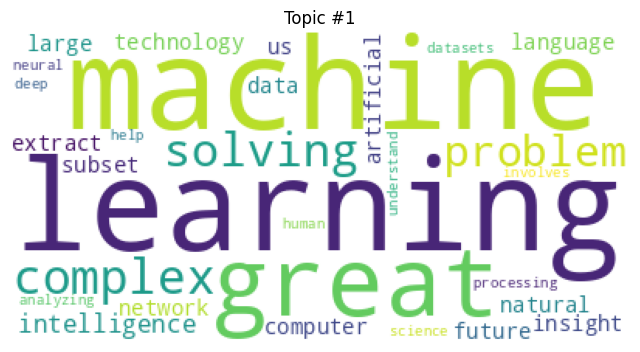

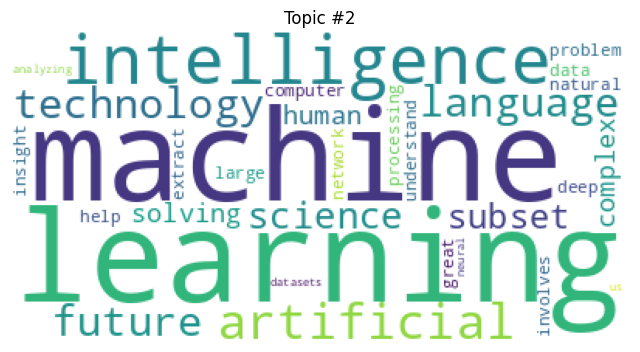

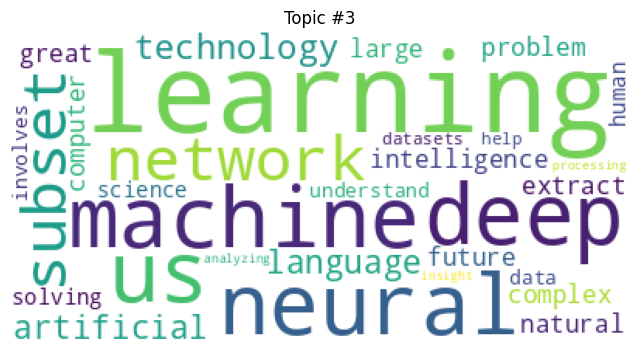

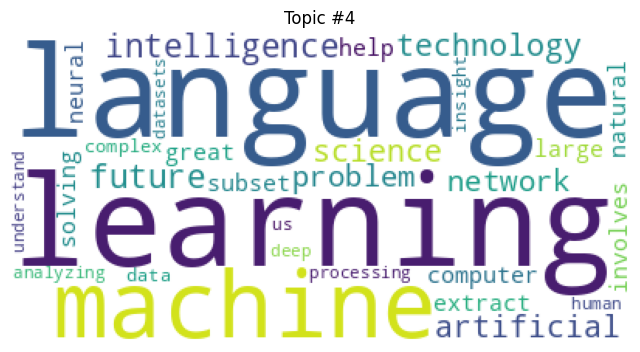

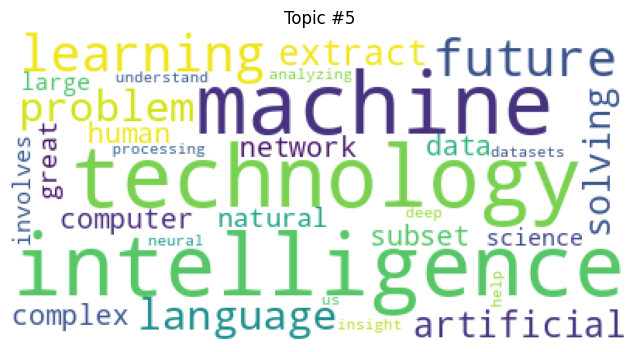

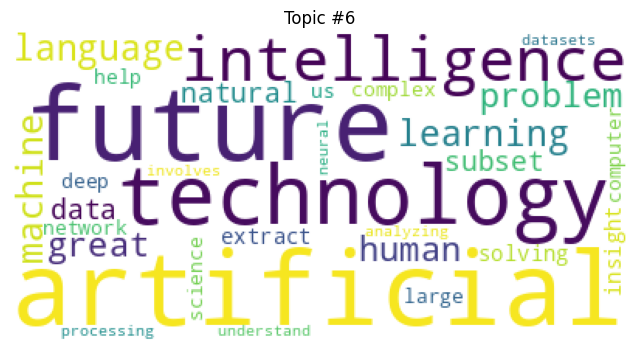

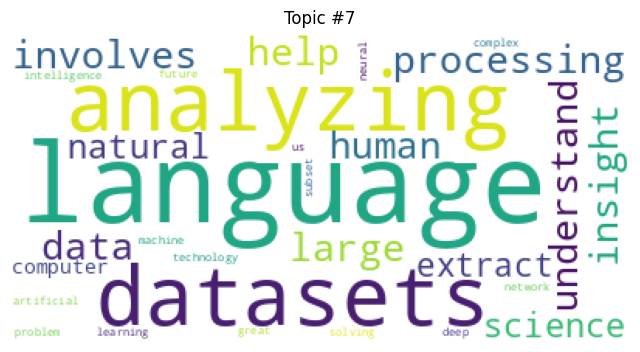

In [48]:
# Visualization 1: Word Clouds for Topics
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to create word clouds for each topic
def plot_word_clouds(lda_model, num_topics):
    for i in range(num_topics):
        plt.figure(figsize=(8, 6))
        plt.imshow(WordCloud(background_color="white").fit_words(dict(lda_model.show_topic(i, 30))))
        plt.axis("off")
        plt.title("Topic #" + str(i+1))
        plt.show()

# Generate word clouds for topics
plot_word_clouds(lda_model, best_k)



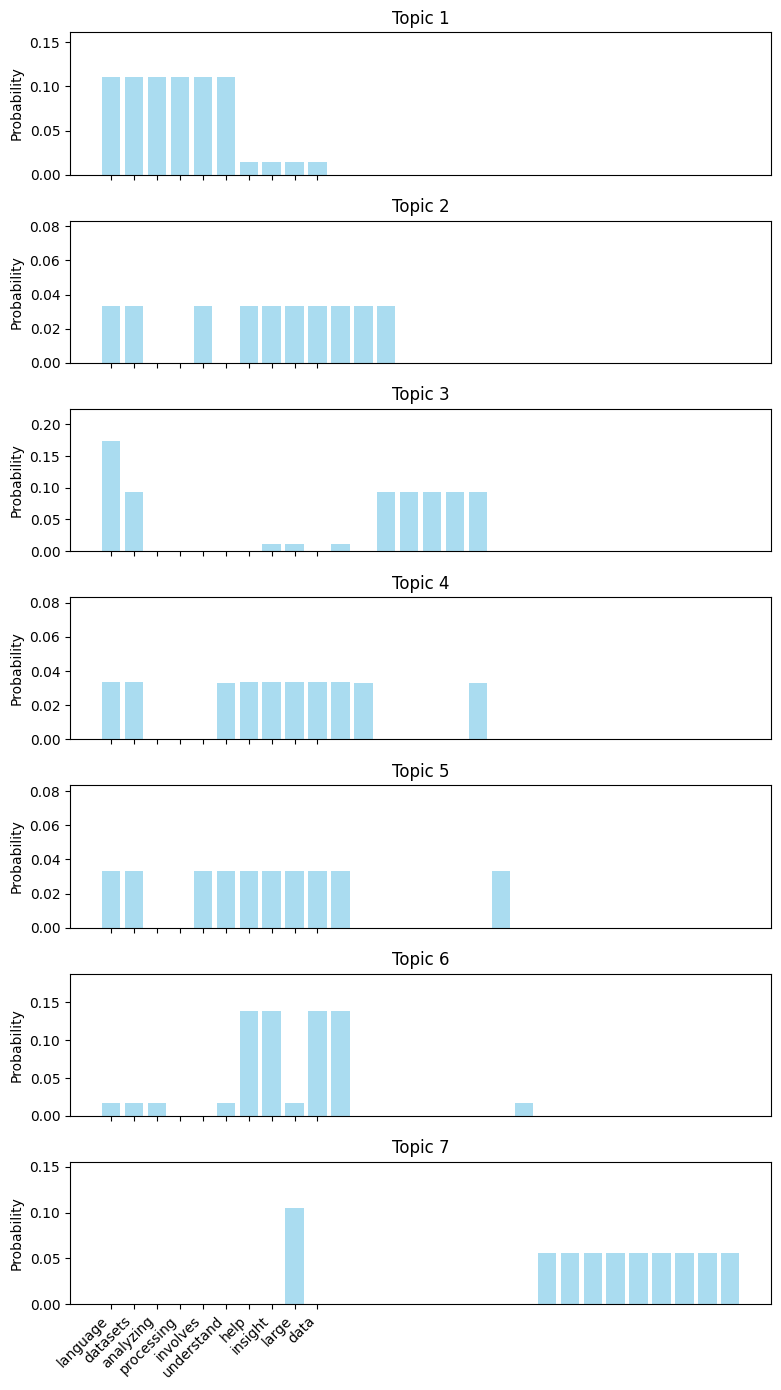

In [50]:

import numpy as np

# Function to plot topic-term distribution
def plot_topic_term_distribution(lda_model, num_words=10):
    num_topics = lda_model.num_topics
    fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(8, 2*num_topics), sharex=True)
    axes = axes.flatten()
    for topic, ax in enumerate(axes):
        topic_terms = lda_model.show_topic(topic, topn=num_words)
        x = [term[0] for term in topic_terms]
        y = [term[1] for term in topic_terms]
        ax.bar(x, y, color='skyblue', alpha=0.7)
        ax.set_title('Topic ' + str(topic+1))
        ax.set_ylabel('Probability')
        ax.set_xticks(np.arange(len(x)))
        ax.set_xticklabels(x, rotation=45, ha='right')
        ax.set_ylim(0, max(y) + 0.05)
    plt.tight_layout()
    plt.show()

# Plot topic-term distribution
plot_topic_term_distribution(lda_model)

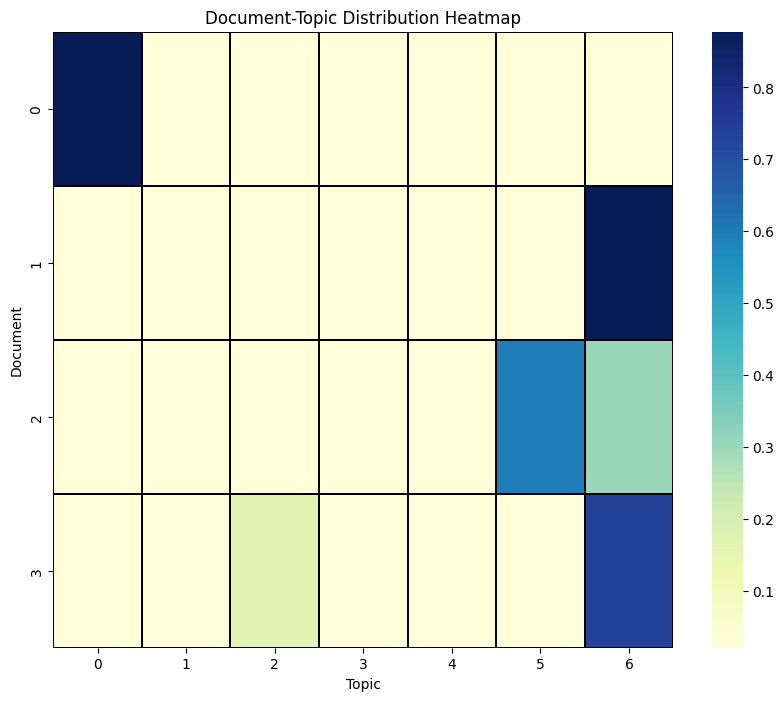

In [53]:
import seaborn as sns
import numpy as np

# Function to create document-topic heatmap
def plot_document_topic_heatmap(lda_model, corpus):
    # Get document-topic probabilities
    document_topic_probs = np.zeros((len(corpus), lda_model.num_topics))
    for i, doc in enumerate(corpus):
        topic_probs = lda_model.get_document_topics(doc)
        for topic, prob in topic_probs:
            document_topic_probs[i, topic] = prob

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(document_topic_probs, cmap="YlGnBu", linewidths=0.1, linecolor='black')
    plt.title('Document-Topic Distribution Heatmap')
    plt.xlabel('Topic')
    plt.ylabel('Document')
    plt.show()

# Plot document-topic heatmap
plot_document_topic_heatmap(lda_model, doc_term_matrix)


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

Topic Coherence is a concept that can be used to evaluate Topic Modeling.To obtain topic models, various methods are employed.These are BERTopic, lda2vec, latent semantic analysis (LSA), and latent dirichlet allocation (LDA).
LDA: The dictionary and the corpus are the two primary inputs used in the LDA topic model. Every word in the document has a unique id created by Gensim.We have to supply the number of topics in addition to the corpus and dictionary.
Using the LDA visualization tool pyLDAvis, we can compare the outcomes by experimenting with a few different subjects.One of the primary methods for estimating the number of subjects is topic coherence.
Several LDA models must be constructed, each with a distinct number of subjects (k) and

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



It was a fantastic educational opportunity. This task offers a comprehensive practical introduction to creating topic modeling models, such as LDA, LSA, and Bertopic. This assignment helped me to understand the fundamental principles of these algorithms. I even learned how to use coherence as a metric to optimize the outcomes.The models' versions  present a challenge because the algorithm has been modified and now produces errors.Additionally, Bertopic was to be accessed using other measures rather than Coherence Score.